# Задание

* Используя данные об объектах недвижимости на сайте "наш.дом.рф" или cian.ru, провести мини-исследование рынка строящейся/готовой недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
#### Идеи для мини-исследования
* Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
* Рассчитать объемы вводимого жилья по регионам и по годам.
* Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах.
* Визуализировать разброс, связь, доли, распределение этих показателей по регионам.
* Сделать выводы по каждому из расчетов и графиков



In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_pickle("df_nashdomrf.pkl")

In [3]:
df.shape

(11714, 110)

In [4]:
df = df.rename(columns={
    "nameObj": "Название объекта",
    "objPriceAvg": "Средняя цена, кв.м",
    "address": "Адрес",
    "region": "Регион",
    "objReady100PercDt": "Срок сдачи",
    "objElemLivingCnt": "Кол-во квартир",
    "floorMax": "Максимум этажей",
    "floorMin": "Минимум этажей",
    "objLkFinishTypeDesc": "Отделка",
    "objElevatorPassengerCnt": "Грузоподъемность лифтов",
    "objElemParkingCnt": "Наличие парковки",
    "objInfrstrBicycleLaneFlg": "Наличие велодорожки",
    "objInfrstrPlaygrndCnt": "Наличие детской площадки",
    "objInfrstrSportGroundCnt": "Наличие спортивной площадки",
    "developer.devFullCleanNm": "Застройщик",
    "developer.devEmail": "Почта застройщика",
    "developer.devPhoneNum": "Телефон застройщика"
})

In [5]:
df = df[["id", "Телефон застройщика", "Почта застройщика",
         "Застройщик","Наличие спортивной площадки","Наличие детской площадки", 
         "Наличие парковки", "Наличие велодорожки","Грузоподъемность лифтов","Отделка",
         "Название объекта","Адрес","Регион", "Срок сдачи", "Средняя цена, кв.м",
         "Кол-во квартир", "Максимум этажей",  "Минимум этажей"]]

### 1) Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.

In [6]:
df["Регион"].isna().unique()

array([False])

In [7]:
mean_by_reggion =  df.groupby(by="Регион")["Средняя цена, кв.м"].agg(np.nanmean)

C:\Users\ilyam\AppData\Local\Temp\ipykernel_5068\282150833.py:1: FutureWarning: The provided callable <function nanmean at 0x00000134F224EA20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_by_reggion =  df.groupby(by="Регион")["Средняя цена, кв.м"].agg(np.nanmean)


In [8]:
mean_by_reggion[mean_by_reggion.isna()]

Регион
49   NaN
79   NaN
83   NaN
87   NaN
Name: Средняя цена, кв.м, dtype: float64

По 4-м регионам нет данных

<Axes: >

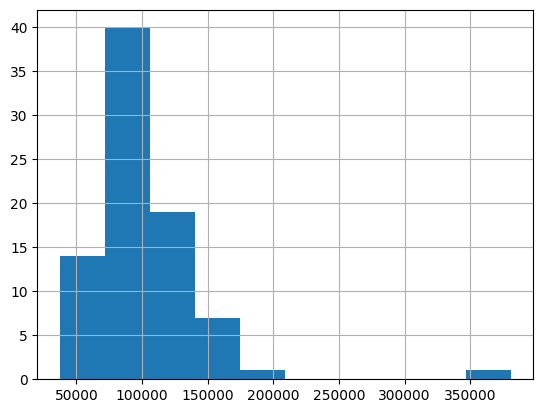

In [9]:
mean_by_reggion.hist()

Топ 5 дорогих регионов

In [10]:
mean_by_reggion.sort_values(ascending=False).head(5)

Регион
77    380934.022152
78    198385.221945
41    169584.000000
23    162334.729345
65    155523.868421
Name: Средняя цена, кв.м, dtype: float64

### 2) Рассчитать объемы вводимого жилья по регионам и по годам.

In [11]:
houses = df.groupby(by="Регион")["id"].count().sort_values(ascending=True)

In [12]:
houses

Регион
87       1
83       1
51       1
79       1
93       3
      ... 
78     562
54     607
50     711
77     888
23    1112
Name: id, Length: 86, dtype: int64

<Axes: ylabel='Регион'>

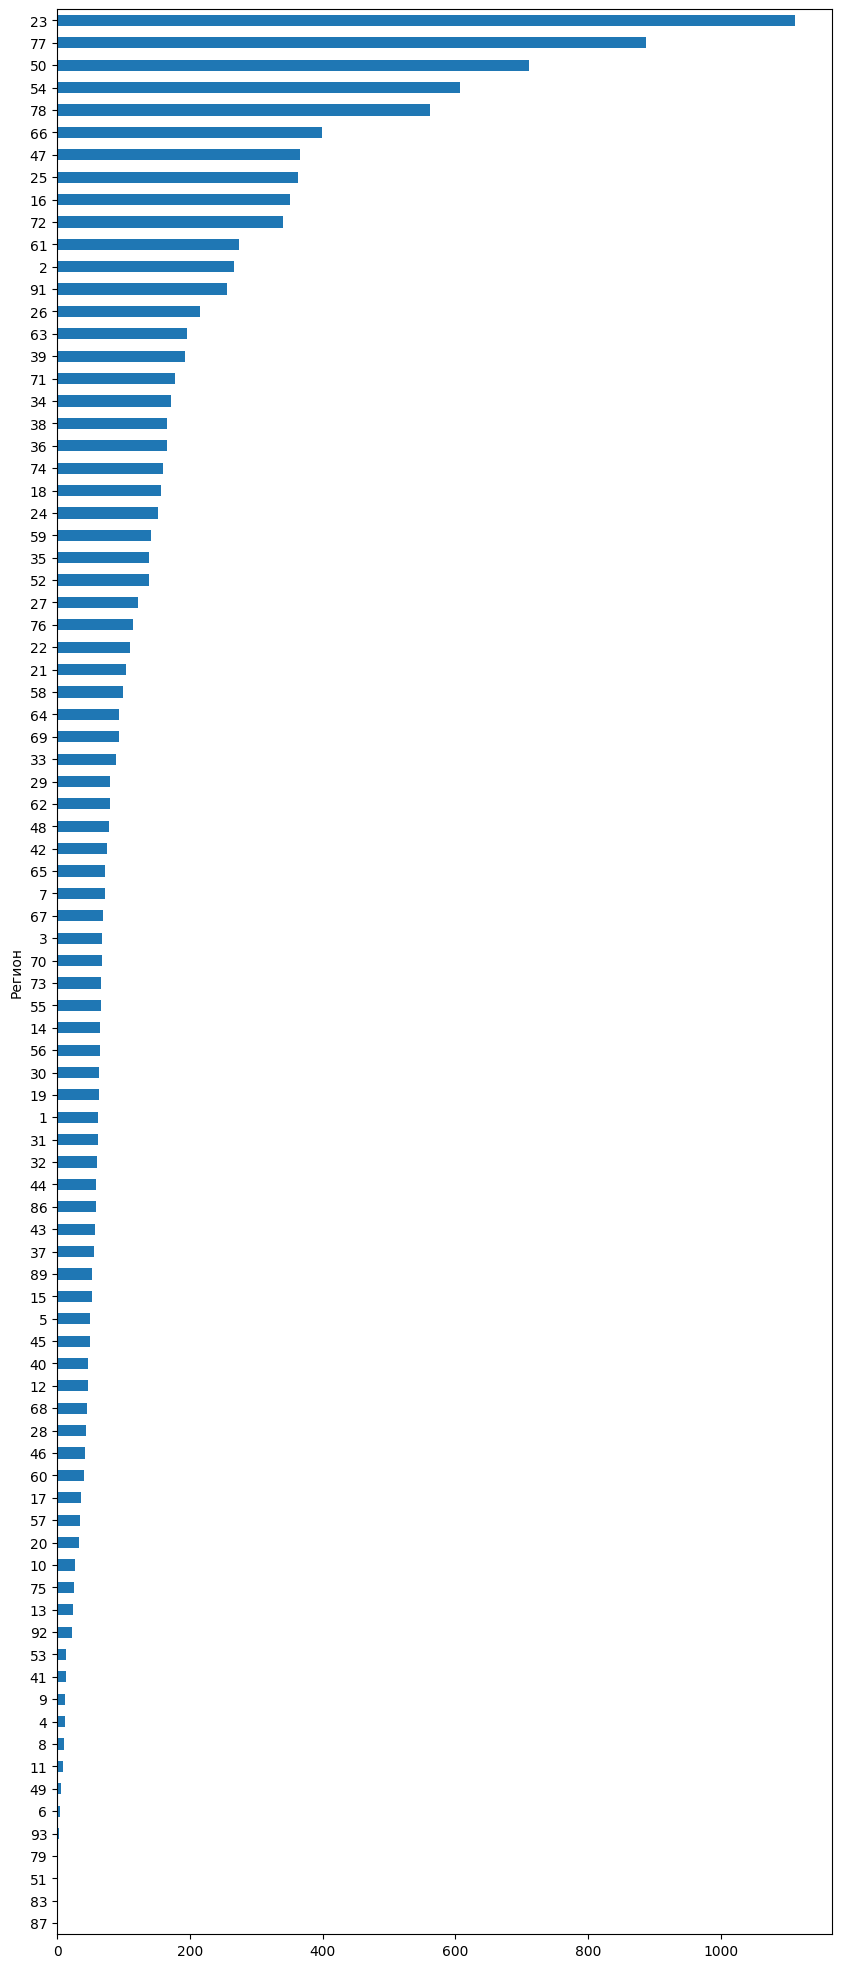

In [13]:
houses.plot.barh(figsize=(10, 25))

__Выводы:__
1) Наибольший объём жилья в 23, 77 и 50 регионах
2) Наименьший обхём жилья в 87, 83, 51, 79 регионах

In [14]:
df['Год сдачи'] = pd.to_datetime(df['Срок сдачи']).dt.strftime('%Y') 
reg_year_df = df.groupby(['Регион', 'Год сдачи'])[['id']].count().reset_index()

In [15]:
reg_year_df.head(2)

,Регион,Год сдачи,id
0,1,2023,3
1,1,2024,24


In [16]:
year_df = reg_year_df.groupby('Год сдачи')['id'].count().sort_index(ascending=True)
year_df

Год сдачи
2018     1
2019     2
2020     3
2021     3
2022     4
2023    76
2024    81
2025    78
2026    75
2027    52
2028    35
2029    17
2030    11
2031     8
2032     8
2033     3
2034     1
2035     1
2036     3
2038     1
2039     1
Name: id, dtype: int64

<Axes: xlabel='Год сдачи'>

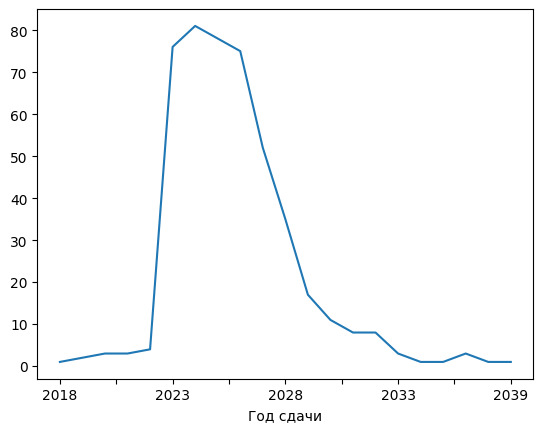

In [17]:
year_df.plot()

__Выводы:__
1) Наибольшее количество жилья планируется сдать в 2024 году

### Сравнение этажности домов разных регионах.

In [18]:
df_max_min_fl = df[['Регион','id','Максимум этажей','Минимум этажей']]

In [19]:
mean_max_fl = df_max_min_fl.groupby('Регион')['Максимум этажей'].mean().sort_values(ascending=True)

In [20]:
mean_max_fl

Регион
87     5.000000
44     5.189655
79     6.000000
17     6.027778
89     6.653846
        ...    
58    16.333333
66    16.932331
62    17.850000
77    18.682432
20    20.333333
Name: Максимум этажей, Length: 86, dtype: float64

<Axes: xlabel='Регион'>

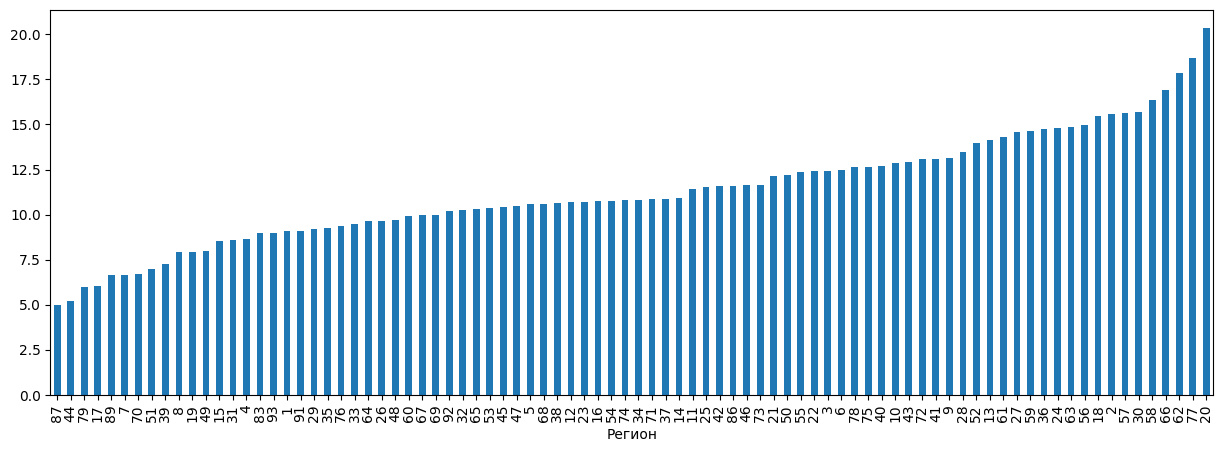

In [21]:
mean_max_fl.plot.bar(figsize=(15, 5))

In [22]:
mean_min_fl = df_max_min_fl.groupby('Регион')["Минимум этажей"].mean().sort_values(ascending=True)

<Axes: xlabel='Регион'>

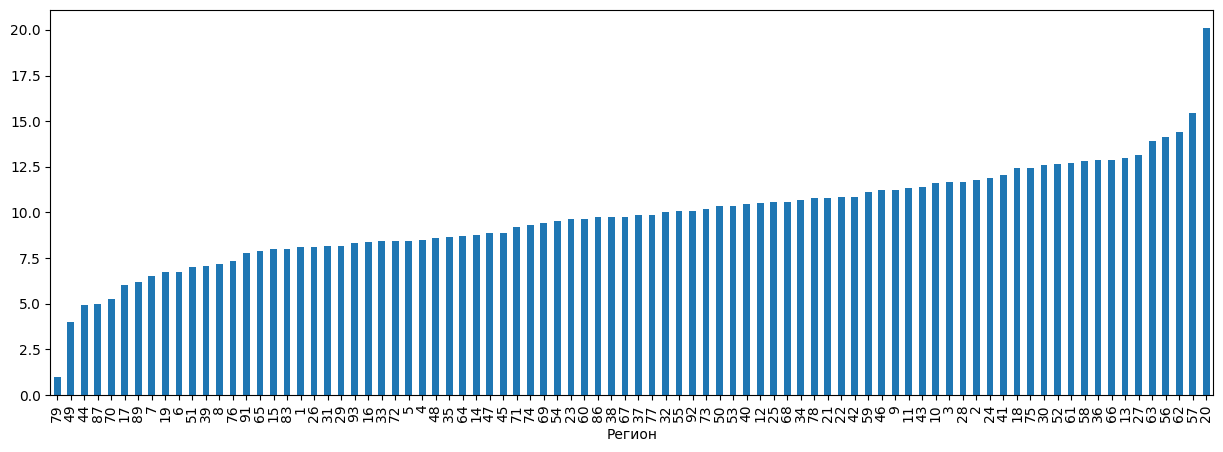

In [23]:
mean_min_fl.plot.bar(figsize=(15, 5))

In [24]:
min_fl = df_max_min_fl.groupby('Регион')["Минимум этажей"].agg(np.nanmin).sort_values(ascending=True)

C:\Users\ilyam\AppData\Local\Temp\ipykernel_5068\2867369144.py:1: FutureWarning: The provided callable <function nanmin at 0x00000134F224E020> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  min_fl = df_max_min_fl.groupby('Регион')["Минимум этажей"].agg(np.nanmin).sort_values(ascending=True)


<Axes: xlabel='Регион'>

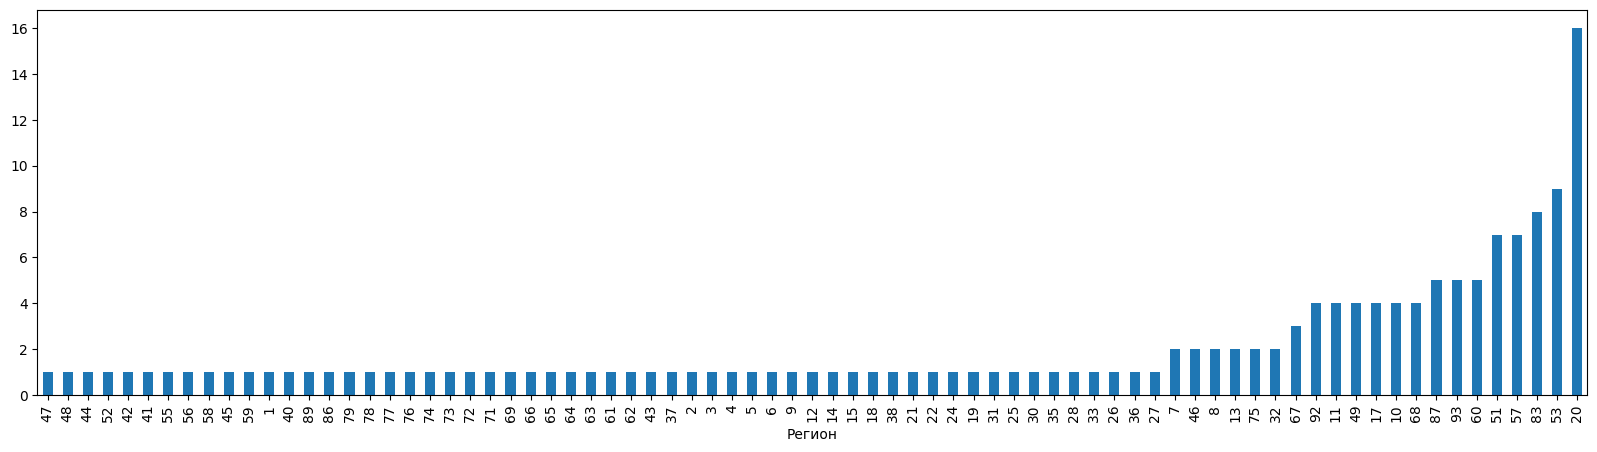

In [25]:
# Минимальное количество этажей
min_fl[min_fl>0].plot.bar(figsize=(20,5))

In [26]:
max_lf = df_max_min_fl.groupby('Регион')["Максимум этажей"].agg(np.nanmax).sort_values(ascending=True)

C:\Users\ilyam\AppData\Local\Temp\ipykernel_5068\3189270987.py:1: FutureWarning: The provided callable <function nanmax at 0x00000134F224E160> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_lf = df_max_min_fl.groupby('Регион')["Максимум этажей"].agg(np.nanmax).sort_values(ascending=True)


<Axes: xlabel='Регион'>

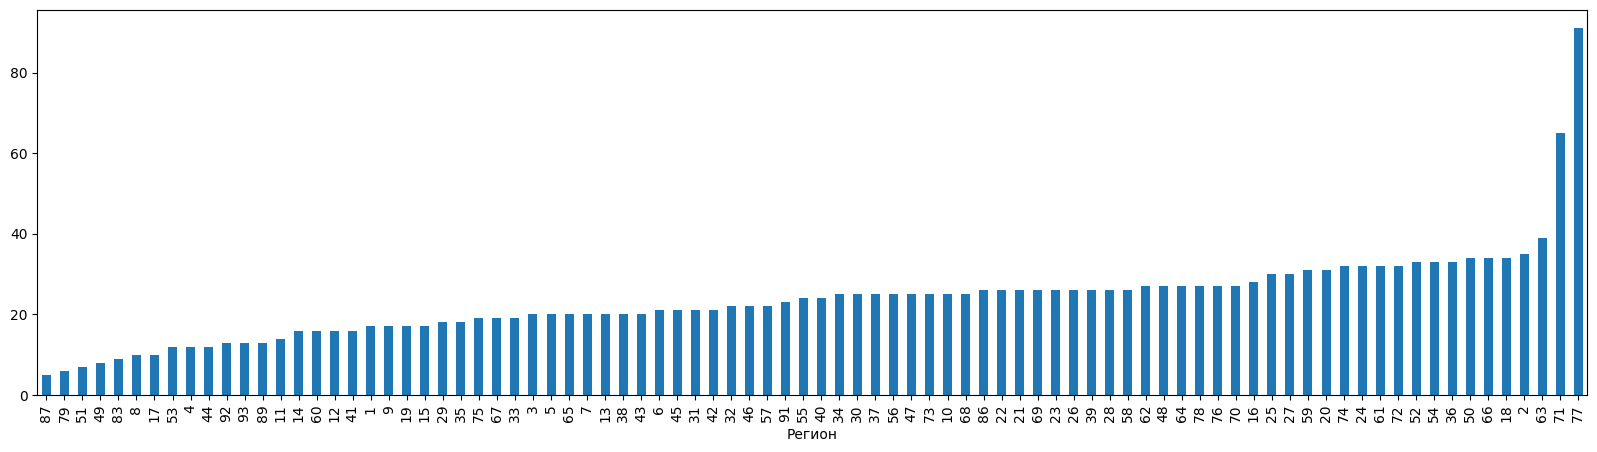

In [27]:
max_lf[max_lf>0].plot.bar(figsize=(20,5))

In [28]:
one_fl = df_max_min_fl.groupby('Минимум этажей')['Регион'].count()

In [29]:
# Количество одноэтажных построек
one_fl.iloc[1]

910

__Выводы:__
1) Максимальное среднее количество этажей в 20-м регионе
2) Минимальное среднее количество этажей в 79-м регионе
3) Количество одноэтажных зданий за исследуемый период во всех регионах 910
4) Самые высокие новостройки в 77 регионе

# Визуализировать разброс, связь, доли, распределение этих показателей по регионам.

In [30]:
import seaborn as sns

In [31]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
corr_df = df.select_dtypes(include=numerics).corr()

<Axes: >

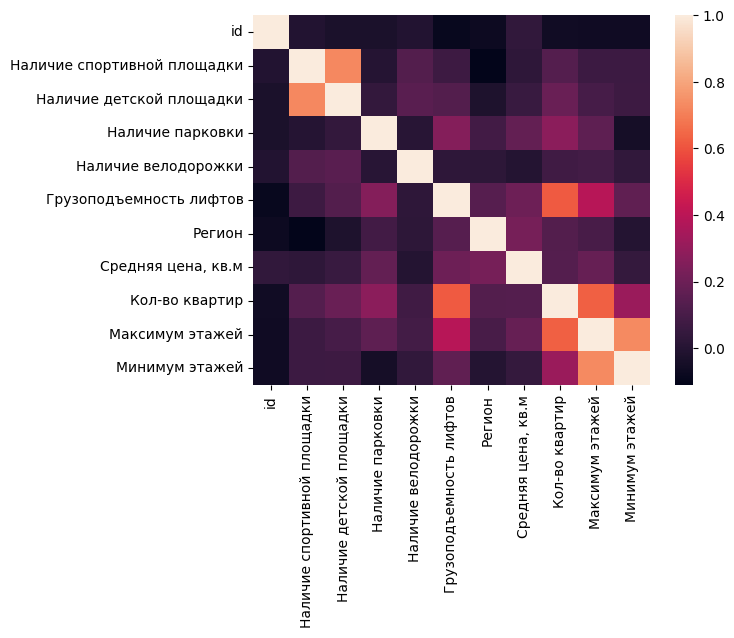

In [32]:
# Коррекляция фичей
sns.heatmap(corr_df)

__Выводы:__
1) Высокая корреляцие между наличием детских и спортивных площадок

In [33]:
df.columns

Index(['id', 'Телефон застройщика', 'Почта застройщика', 'Застройщик',
       'Наличие спортивной площадки', 'Наличие детской площадки',
       'Наличие парковки', 'Наличие велодорожки', 'Грузоподъемность лифтов',
       'Отделка', 'Название объекта', 'Адрес', 'Регион', 'Срок сдачи',
       'Средняя цена, кв.м', 'Кол-во квартир', 'Максимум этажей',
       'Минимум этажей', 'Год сдачи'],
      dtype='object')

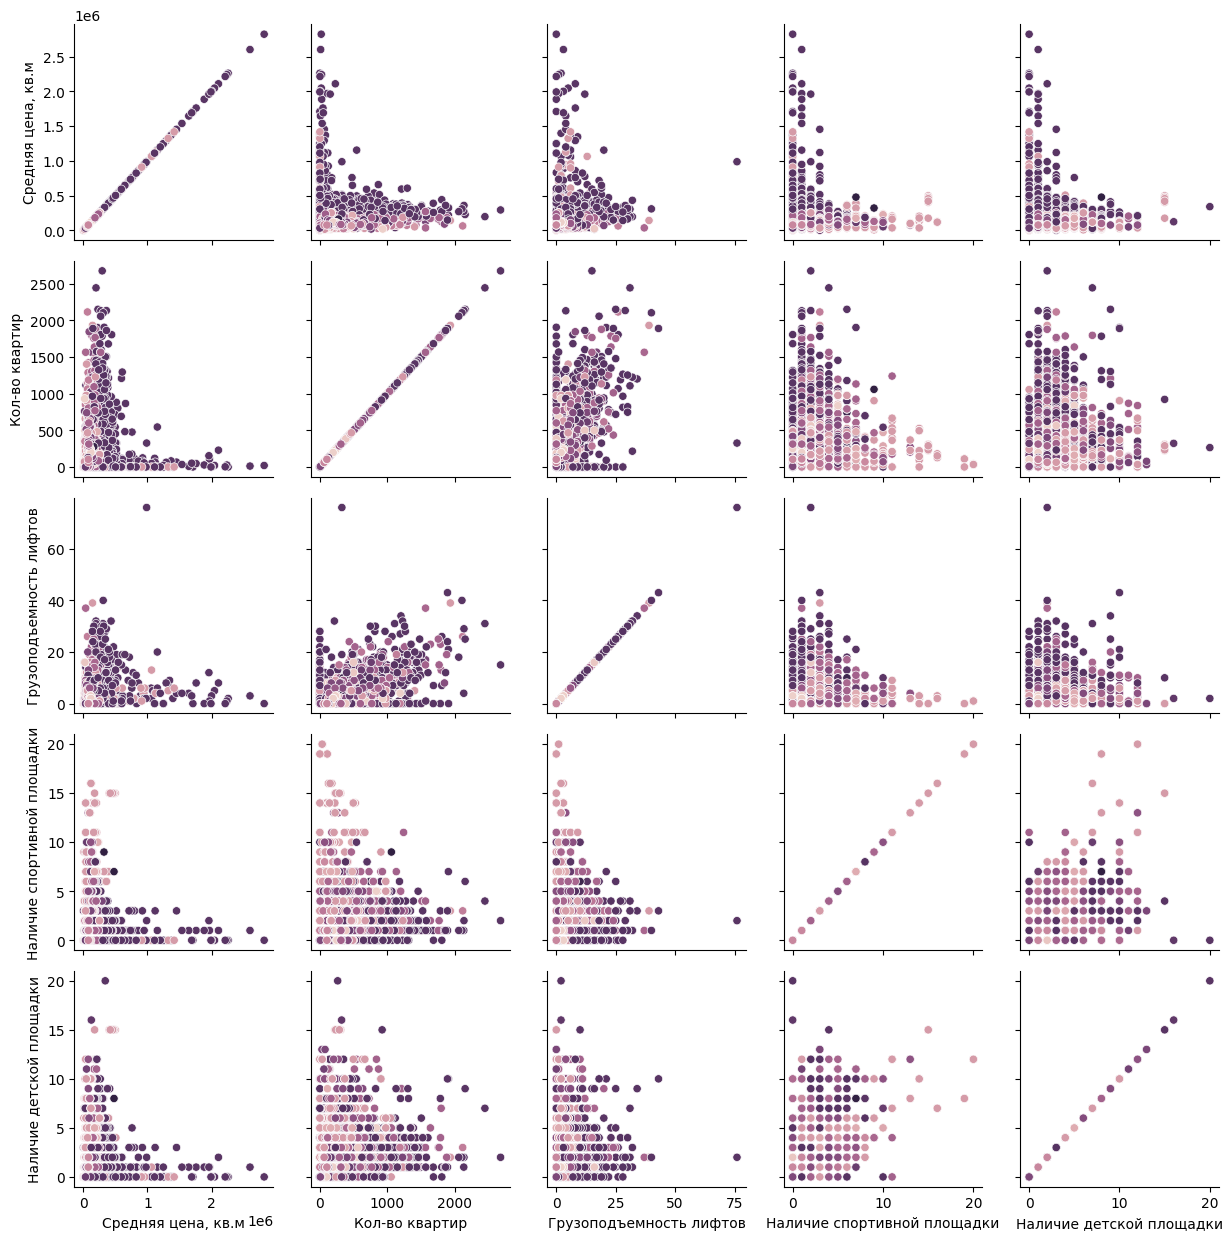

In [34]:
plot = sns.PairGrid(df[["Регион", 'Средняя цена, кв.м', "Кол-во квартир", "Грузоподъемность лифтов",
                        "Наличие спортивной площадки", "Наличие детской площадки"]], hue="Регион")
plot.map(sns.scatterplot)